In [1]:
import sys
sys.path.append('../')

from model import DecisionTree
from sklearn.model_selection import KFold

import os
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

warnings.filterwarnings(action='ignore')

In [2]:
embed_model = 'srgnn'
filename = {'sage' : 'user_embedding_sage_sid_6to6_weighted.npy', 'srgnn' : 'srgnn_user_hybrid_6to6_weighted.npy'}
data_path = "../data/"

ptitle_pivot_df = pd.read_csv(os.path.join(data_path, 'pivot_ptitle_data.csv'), index_col=0)
genre_pivot_df = pd.read_csv(os.path.join(data_path, 'pivot_genre2_data.csv'), index_col=0)
embedding = np.load(os.path.join(data_path, filename[embed_model]))
k = 15

In [7]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)
n_fold = 0
k_fold_result = []

for train_idx, valid_idx in kf.split(genre_pivot_df):
    model = DecisionTree(genre_pivot_df, embedding)
    model.validation = True
    n_fold += 1
    print(f'{n_fold} Fold ...')
    model.x_train, model.y_train = model.X[train_idx], model.Y[train_idx]
    model.x_valid, model.y_valid = model.X[valid_idx], model.Y[valid_idx]

    for i in range(k):
        print(f'{i} Segment ...', end='\r')
        model.kmeans_target(i)

        result = [n_fold, i]
        dt = model.make_dt(min_impurity_decrease=0.0005)
 
        score = model.get_score(dt, scoring='all')
        val_score = model.get_valid_score(dt, scoring='all')
        result.extend(score)
        result.extend(val_score)
    
        k_fold_result.append(result)

cols = ['k_fold','segment', 'recall', 'precision', 'f1_score', 'accuracy', 
        'test_recall', 'test_precision', 'test_f1_score', 'test_accuracy']

genre_result = pd.DataFrame(k_fold_result, columns=cols)
genre_result.mean()

1 Fold ...
2 Fold ... ...
3 Fold ... ...
4 Fold ... ...
5 Fold ... ...
6 Fold ... ...
7 Fold ... ...
8 Fold ... ...
9 Fold ... ...
10 Fold ......


k_fold             5.500000
segment           13.000000
recall             0.566786
precision          0.956036
f1_score           0.708323
accuracy           0.989254
test_recall        0.171381
test_precision     0.297626
test_f1_score      0.208424
test_accuracy      0.970676
dtype: float64

In [8]:
temp1 = genre_result[genre_result['segment'] == 13]
temp2 = pd.DataFrame(temp1.mean().values).T
temp2.columns = cols
temp2['k_fold'] = 'avg'
pd.concat([temp1,temp2], axis=0)

,k_fold,segment,recall,precision,f1_score,accuracy,test_recall,test_precision,test_f1_score,test_accuracy
0,1,13.0,0.683673,0.930556,0.788235,0.991680,0.071429,0.111111,0.086957,0.956341
1,2,13.0,0.540816,0.963636,0.692810,0.989138,0.214286,0.600000,0.315789,0.972973
2,3,13.0,0.613861,0.939394,0.742515,0.990062,0.272727,0.375000,0.315789,0.972973
3,4,13.0,0.520000,0.962963,0.675325,0.988445,0.083333,0.333333,0.133333,0.972973
4,5,13.0,0.640777,0.942857,0.763006,0.990525,0.000000,0.000000,0.000000,0.964657
5,6,13.0,0.485437,0.980392,0.649351,0.987520,0.333333,0.375000,0.352941,0.977131
6,7,13.0,0.464646,1.000000,0.634483,0.987751,0.230769,0.500000,0.315789,0.972973
7,8,13.0,0.632653,0.953846,0.760736,0.990987,0.000000,0.000000,0.000000,0.964657
8,9,13.0,0.571429,0.923077,0.705882,0.988447,0.285714,0.500000,0.363636,0.985417
9,10,13.0,0.514563,0.963636,0.670886,0.987985,0.222222,0.181818,0.200000,0.966667


In [60]:
genre_result.to_excel('../output/k_fold_결과.xlsx')

In [7]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)
n_fold = 0
k_fold_result = []

for train_idx, valid_idx in kf.split(genre_pivot_df):
    model = DecisionTree(genre_pivot_df, embedding)
    model.validation = True
    n_fold += 1
    print(f'{n_fold} Fold ...')
    model.x_train, model.y_train = model.X[train_idx], model.Y[train_idx]
    model.x_valid, model.y_valid = model.X[valid_idx], model.Y[valid_idx]

    result = []
    dt = model.make_dt(min_samples_leaf=25, min_impurity_decrease=0.0007)
    
    score = model.get_score(dt, scoring='all')
    val_score = model.get_valid_score(dt, scoring='all')
    result.extend(score)
    result.extend(val_score)

    k_fold_result.append(result)
    
genre_result = pd.DataFrame(k_fold_result, columns=['recall', 'precision', 'f1_score', 'valid_recall', 'valid_precision', 'valid_f1_score'])
genre_result.mean()

1 Fold ...
2 Fold ...
3 Fold ...
4 Fold ...
5 Fold ...
6 Fold ...
7 Fold ...
8 Fold ...
9 Fold ...
10 Fold ...


recall             0.497837
precision          0.545394
f1_score           0.510589
valid_recall       0.378364
valid_precision    0.406292
valid_f1_score     0.377890
dtype: float64

1 Fold ...


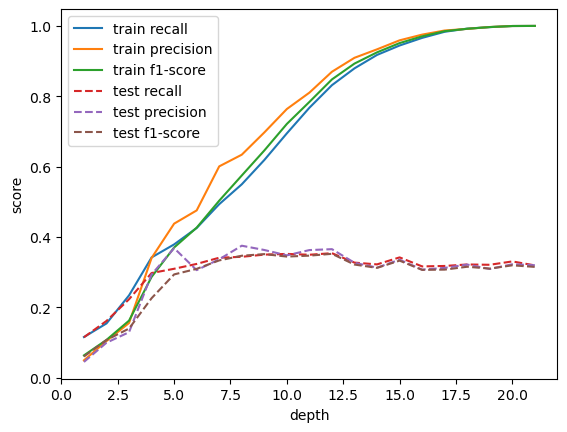

2 Fold ...


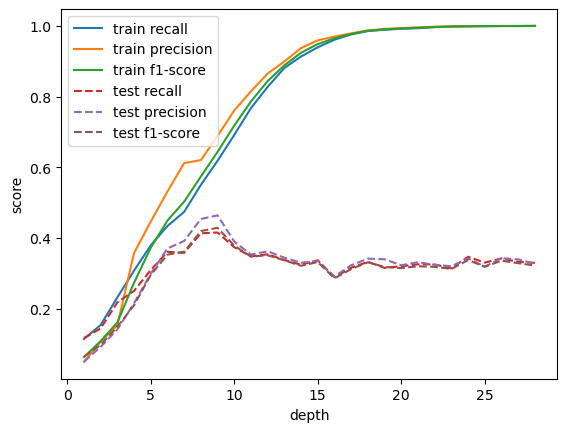

3 Fold ...


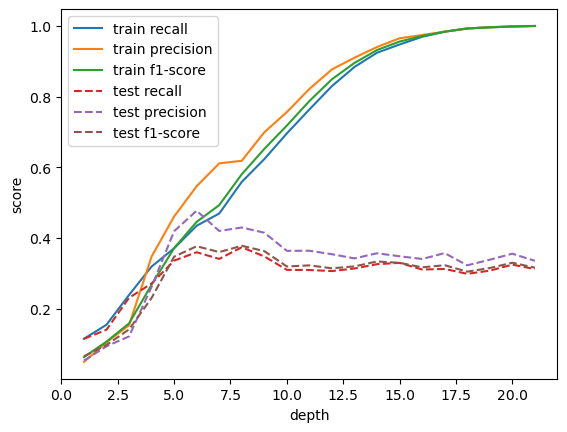

4 Fold ...


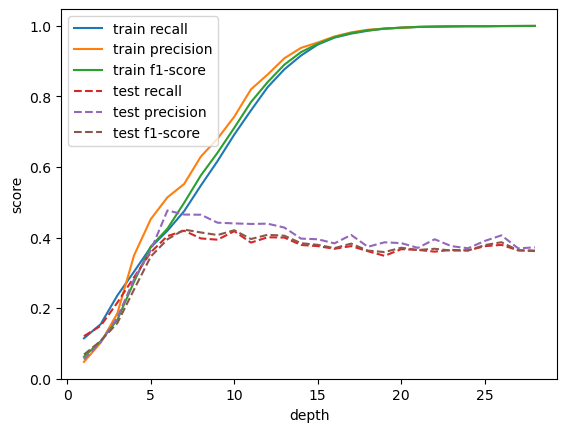

5 Fold ...


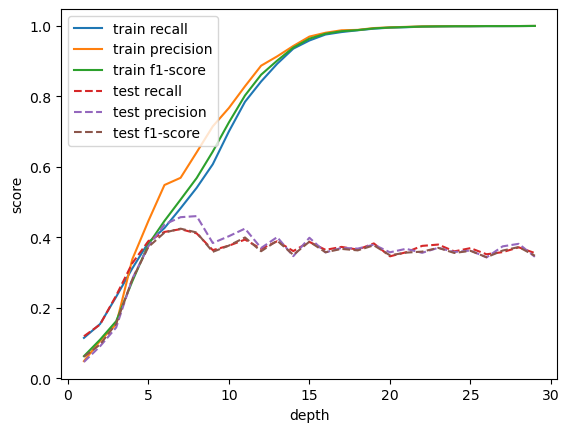

6 Fold ...


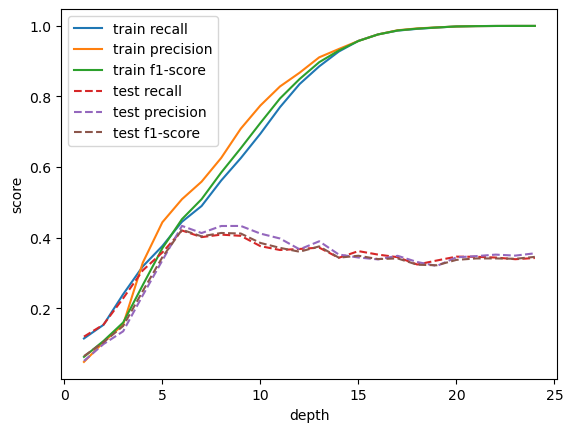

7 Fold ...


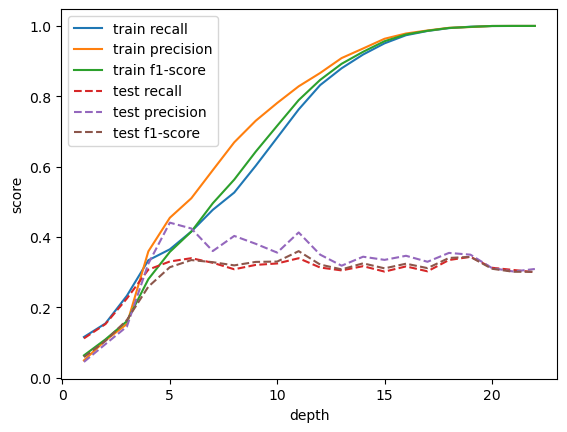

8 Fold ...


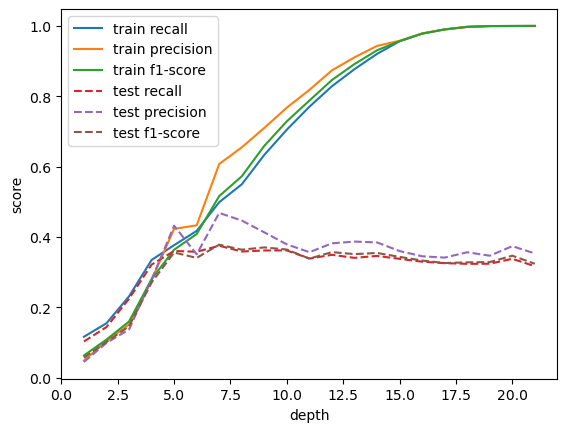

9 Fold ...


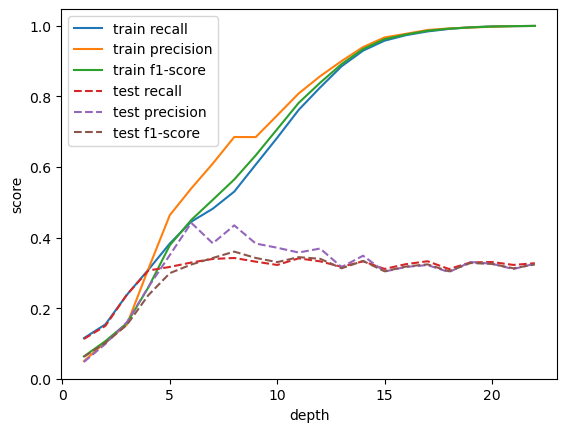

10 Fold ...


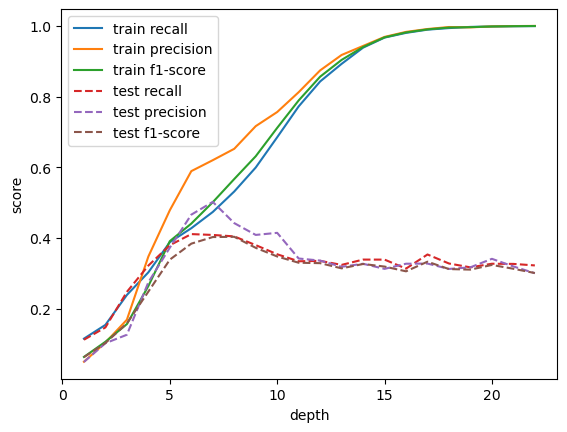

In [5]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)
n_fold = 0
k_fold_result = []

for train_idx, valid_idx in kf.split(genre_pivot_df):
    model = DecisionTree(genre_pivot_df, embedding)
    model.validation = True
    n_fold += 1
    print(f'{n_fold} Fold ...')
    model.x_train, model.y_train = model.X[train_idx], model.Y[train_idx]
    model.x_valid, model.y_valid = model.X[valid_idx], model.Y[valid_idx]

    score_list, val_score_list = model.get_all_depth(scoring='all', visualize=False)

    r_list = [] 
    p_list = []
    f_list = []

    vr_list = [] 
    vp_list = []
    vf_list = []

    for score, val_score in zip(score_list, val_score_list):
        r_list.append(score[0])
        p_list.append(score[1])
        f_list.append(score[2])

        vr_list.append(val_score[0])
        vp_list.append(val_score[1])
        vf_list.append(val_score[2])

    plt.plot(range(1, len(score_list)+1), r_list, label='train recall')
    plt.plot(range(1, len(score_list)+1), p_list, label='train precision')
    plt.plot(range(1, len(score_list)+1), f_list, label='train f1-score')

    plt.plot(range(1, len(score_list)+1), vr_list, '--', label='test recall')
    plt.plot(range(1, len(score_list)+1), vp_list, '--', label='test precision')
    plt.plot(range(1, len(score_list)+1), vf_list, '--', label='test f1-score')

    plt.legend()
    plt.xlabel('depth')
    plt.ylabel('score')
    plt.show()